<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de regresión con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 3: Ajuste de modelos de Deep Learning</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [California Housing Dataset](#section2)
* [Establecer una función de coste adecuada a nuestro problema](#section3)
* [Overfitting sobre un pequeño conjunto de datos](#section4)
    - [Ejercicio 1](section4.1)
    - [Ejercicio 2](section4.2)
    - [Ejercicio 3](section4.3)
    - [Ejercicio 4](section4.4)
    - [Ejercicio 5](section4.5)
* [Elegimos un Optimizer](#section5)
    - [Ejercicio 6](section5.1)
    - [Ejercicio 7](section5.2)
    - [Ejercicio 8](section5.3)
* [Probar diferentes configuraciones con un número pequeño de epochs](#section6)
    - [Ejercicio 9](section6.1)
    - [Ejercicio 10](section6.2)
* [Ajuste refinado de los parámetros con más epochs](#section7)
    - [Ejercicio 11](section7.1)
    - [Ejercicio 12](section7.2)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la última actividad realizada en la semana anterior. En la actividad de la semana anterior encontramos la mejor arquitectura para los datos que tenemos y ahora vmoas a realizar más experimentos jugando con los optimizers y el valor del learning rate.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (California Housing Dataset) y desde 0 intentar llegar conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendrmeos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional son los últimos ejercicios donde tendréis que sacar una conclusión de si la red que habéis llegado a conseguir tiene un buen rendimiento.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset California Housing con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección. 

# <font color="#004D7F" size=5>California Housing Dataset</font>
En este notebook vamos a usar un dataset nuevo, el dataset es muy parecido al dataset del precio de las casas de boston. Esta vez vamos a utilizar un conjunto de datos que contienen información sobre el precio de las casas encontradas en un distrito de California. Las columnas son las siguientes:

- _longitude_: cuanto de al oeste está una casa; un valor más alto está más al oeste.
- _latitude_: cuanto de al norte está una casa; un valor más alto está más al norte.
- _housing_median_age_: edad media de una casa; un valor bajo es una casa más nueva.
- _total_rooms_: número total de habitaciones.
- _total_bedrooms_: número total de dormitorios.
- _population_: número total de personas que residen.
- _households_: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda.
- _median_income_: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares).
- _ocean_proximity_: ubicación de la casa cerca del océano o mar.
- _median_house_value (**variables a predecir**)_: valor medio de la vivienda (medido en dólares).

Vamos a cargar los datos desde el fichero `housing.csv`:

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [5]:
df.shape

(20433, 10)

Vamos a separar la variable objetivo del resto de variables (accedemos al campo value para que los datos sean de tipo _numpy array_ y se puedan usar como variable de entrada de nuestra red):

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

## 1. Establecer una función de coste adecuada a nuestro problema.

En este caso, como es un problema de regresión y los valores de nuestros datos son tan grandes, elegimos la función de coste `mean_absolute_percentage_error`, este error varía entre los valores 100 y 0 donde 100 es el pero error que podemos llegar a tener y 0 es el mejor error, por lo que en nuestros entrenamientos buscaremos un error más cercano a 0.

In [8]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting sobre un pequeño conjunto de datos.

Ahora, como ya hemos visto en clase vamos a encontrar una estructura de red que encaje con los datos que vamos a utilizar. Vamos a crear varias redes a ver que talfuncionan.

Para hacer entrenamientos rápidos y ver si la red se adapta a los datos vamos a usar solo un subconjunto de los datos, es decir usaremos 1000 datos y no usaremos conjunto de validación. 

### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

***En los datos de entrada ponemos 9, porque con df.shape hemos visto que tenemos 10 columnas, pero como luego dividimos los datos en Y pusimos la variable independiente, nos quedan 9 datos de entrada que los hemos asignado en X.***

In [9]:
# Configuramos la red
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt1 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model1.compile(
    optimizer= opt1,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist1 = model1.fit(x[0:1000], y[0:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.4552 - mean_absolute_percentage_error: 99.4552
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 99.1853 - mean_absolute_percentage_error: 99.1853
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 98.8401 - mean_absolute_percentage_error: 98.8401
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 98.4094 - mean_absolute_percentage_error: 98.4094
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 97.8524 - mean_absolute_percentage_error: 97.8524
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 97.1347 - mean_absolute_percentage_error: 97.1347
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 96.2165 - mean_absolute_percentage_error: 96.2165
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 94.9316 - mean_absolute_percentage_error: 94.9316
Epoch 9/30
32/32 [======

***El error empieza de 99 y baja hasta casi 44.***

### <font color="#004D7F" size=4>Ejercicio 2</font>

Vamos a complicar un poco más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [10]:
# Configuramos la red
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt2 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model2.compile(
    optimizer= opt2,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist2 = model2.fit(x[0:1000], y[0:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.7084 - mean_absolute_percentage_error: 99.7084
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 98.1528 - mean_absolute_percentage_error: 98.1528
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 91.5780 - mean_absolute_percentage_error: 91.5780
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 69.6364 - mean_absolute_percentage_error: 69.6364
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 46.1725 - mean_absolute_percentage_error: 46.1725
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 45.1458 - mean_absolute_percentage_error: 45.1458
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 44.7394 - mean_absolute_percentage_error: 44.7394
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 44.4256 - mean_absolute_percentage_error: 44.4256
Epoch 9/30
32/32 [======

***Poniendo mas capas densas el error empieza de 99.000 y baja hasta 29.000 casi.***

### <font color="#004D7F" size=4>Ejercicio 3</font>

Vamos a complicar aun más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *6º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [11]:
# Configuramos la red
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt3 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model3.compile(
    optimizer= opt3,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist3 = model3.fit(x[0:1000], y[0:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 5ms/step - loss: 99.1438 - mean_absolute_percentage_error: 99.1438
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 91.3266 - mean_absolute_percentage_error: 91.3266
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 56.7575 - mean_absolute_percentage_error: 56.7575
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 45.6230 - mean_absolute_percentage_error: 45.6230
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 44.6825 - mean_absolute_percentage_error: 44.6825
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 44.1522 - mean_absolute_percentage_error: 44.1522
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 43.5554 - mean_absolute_percentage_error: 43.5554
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 42.8343 - mean_absolute_percentage_error: 42.8343
Epoch 9/30
32/32 [======

***Nos da más o menos los mismos resultados que el anterior. El error empieza de 99.000 y llega al 26.000.***

### <font color="#004D7F" size=4>Ejercicio 4</font>

Vamos a hacer una última red con más capas y neuronas:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 1024 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 512 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 256 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *6º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *7º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *8º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *9º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [12]:
# Configuramos la red
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt4 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model4.compile(
    optimizer= opt4,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist4 = model4.fit(x[0:1000], y[0:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 3s 18ms/step - loss: 79.8251 - mean_absolute_percentage_error: 79.8251
Epoch 2/30
32/32 [==============================] - 1s 16ms/step - loss: 44.4749 - mean_absolute_percentage_error: 44.4749
Epoch 3/30
32/32 [==============================] - 1s 17ms/step - loss: 41.9296 - mean_absolute_percentage_error: 41.9296
Epoch 4/30
32/32 [==============================] - 1s 16ms/step - loss: 36.7547 - mean_absolute_percentage_error: 36.7547
Epoch 5/30
32/32 [==============================] - 1s 16ms/step - loss: 29.8152 - mean_absolute_percentage_error: 29.8152
Epoch 6/30
32/32 [==============================] - 1s 16ms/step - loss: 28.9816 - mean_absolute_percentage_error: 28.9816
Epoch 7/30
32/32 [==============================] - 1s 21ms/step - loss: 26.6537 - mean_absolute_percentage_error: 26.6537
Epoch 8/30
32/32 [==============================] - 1s 23ms/step - loss: 27.6107 - mean_absolute_percentage_error: 27.6107
Epoch 9/30
32/32

***Parece que este modelo nos da mejores resultados. Baja el error de 79 a 19.***

### <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada una de las arquitecturas definidas y quédate con la mejor. **¿En qué experimento se obtiene los mejores resultados?**

La arquitectura elegida la usaremos en el caso práctico para seguir ajustando nuestro modelo y alcanzar un buen rendimiento.

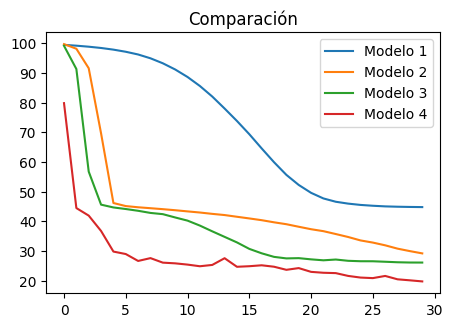

In [13]:
# Comparampos los modelos

fig=plt.figure(figsize=(60, 40))

fig.add_subplot(10, 10, 1)
plt.title('Comparación')
plt.plot(hist1.history['loss'], label='Modelo 1')
plt.plot(hist2.history['loss'], label='Modelo 2')
plt.plot(hist3.history['loss'], label='Modelo 3')
plt.plot(hist4.history['loss'], label='Modelo 4')
plt.legend()


***Evidentemente el mejor modelo nos lo da el experimento 4 para la prueba con 1000 datos. El primer modelo empieza estancado luego baja el error. El segundo en cuando llega a 45% se estanca. El tercero casi igual que el segundo. El 4 tampoco esta perfecto, pero de los cuatro, el 4º es el que mejor aprende.***

***Nos quedamos con el 4º modelo.***

## 3. Elegimos un Optimizer.

Hemos establecido Adam en los entrenamientos anteriores. Vamos a comprobarlo para el conjunto de validación como funciona y después probaremos a usar un optimizador SGD.

### <font color="#004D7F" size=4>Ejercicio 6</font>

Usa la mejor arquitectura y configuración de entrenamiento de los ejercicios anteriores y entrena con la siguiente configuración:

- Usa un `validation_split` de 0.2
- Utiliza todos los datos y no solo 1000.
- Usa 5 epochs en total.

In [14]:
# Configuramos la red
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt5 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model5.compile(
    optimizer= opt5,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo con 20% de los datos para el Test y para el Train todos los datos
hist5 = model5.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 11s 17ms/step - loss: 48.1113 - mean_absolute_percentage_error: 48.1113 - val_loss: 50.7339 - val_mean_absolute_percentage_error: 50.7339
Epoch 2/5
511/511 [==============================] - 9s 18ms/step - loss: 40.6680 - mean_absolute_percentage_error: 40.6680 - val_loss: 43.4796 - val_mean_absolute_percentage_error: 43.4796
Epoch 3/5
511/511 [==============================] - 10s 19ms/step - loss: 38.0678 - mean_absolute_percentage_error: 38.0678 - val_loss: 42.9897 - val_mean_absolute_percentage_error: 42.9897
Epoch 4/5
511/511 [==============================] - 10s 19ms/step - loss: 34.8819 - mean_absolute_percentage_error: 34.8819 - val_loss: 36.9135 - val_mean_absolute_percentage_error: 36.9135
Epoch 5/5
511/511 [==============================] - 9s 17ms/step - loss: 33.6755 - mean_absolute_percentage_error: 33.6755 - val_loss: 35.3865 - val_mean_absolute_percentage_error: 35.3865


***Con todos los datos el error de Train empieza de 48 y baja hasta 33, el de Test de 50 a 35.***

### <font color="#004D7F" size=4>Ejercicio 7</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero usa un optimizador **SGD** en lugar de un Adam.

In [15]:
# Configuramos la red
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt6 = tf.keras.optimizers.SGD(
    learning_rate = 0.001
)

# Compilamos el modelo
model6.compile(
    optimizer= opt6,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist6 = model6.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 10s 16ms/step - loss: 91.8935 - mean_absolute_percentage_error: 91.8935 - val_loss: 57.1316 - val_mean_absolute_percentage_error: 57.1316
Epoch 2/5
511/511 [==============================] - 8s 16ms/step - loss: 56.5815 - mean_absolute_percentage_error: 56.5815 - val_loss: 57.2137 - val_mean_absolute_percentage_error: 57.2137
Epoch 3/5
511/511 [==============================] - 7s 14ms/step - loss: 55.9726 - mean_absolute_percentage_error: 55.9726 - val_loss: 56.4313 - val_mean_absolute_percentage_error: 56.4313
Epoch 4/5
511/511 [==============================] - 8s 16ms/step - loss: 53.7832 - mean_absolute_percentage_error: 53.7832 - val_loss: 50.8551 - val_mean_absolute_percentage_error: 50.8551
Epoch 5/5
511/511 [==============================] - 8s 16ms/step - loss: 49.9188 - mean_absolute_percentage_error: 49.9188 - val_loss: 48.4409 - val_mean_absolute_percentage_error: 48.4409


***Con el Optimizador SGD el error empieza de 91 y baja hasta 50.***

### <font color="#004D7F" size=4>Ejercicio 8</font>

**¿Qué optimizador ha funcionado mejor?**

El optimizador que eligas tendrás que usarlo en los siguientes ejercicios.

***El optimizador SGD parece que ha funcionado mejor. Vamos a graficar los dos entrenamientos para asegurarnos.***

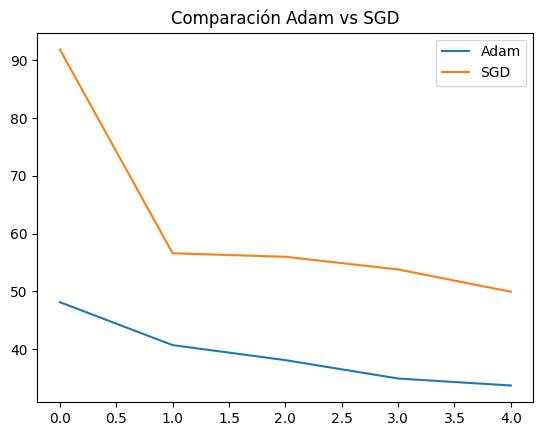

In [16]:
fig.add_subplot(10, 10, 1)
plt.title('Comparación Adam vs SGD')
plt.plot(hist5.history['loss'], label='Adam')
plt.plot(hist6.history['loss'], label='SGD')
plt.legend()

***Pues NO. Mejor nos ha salido con el Optimizador Adam, porque con el SGD deja de aprender en cuando llegua a 55 y es un error muy alto. Adam aunque empieza de 47, nos da un error de 35 que es más aceptable que 55.***

## 4. Probar diferentes configuraciones con un número pequeño de epochs.

Vamos a realizar diferentes experimentos cambiando el learning rate de nuestro optimizador.

### <font color="#004D7F" size=4>Ejercicio 9</font>

Realiza un entrenamiento con la arquitectura y el optimizador que mejor te ha funcionado y utilizar un **learning rate de 0.1**.

***Nos ha funcionado mejor la arquitectura de 1024, 512, 256, 128, 64, 32 y 16 neuronas con el Optimizador Adam.*** 

In [17]:
# Configuramos la red
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt7 = tf.keras.optimizers.Adam(
    learning_rate = 0.1
)

# Compilamos el modelo
model7.compile(
    optimizer= opt7,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist7 = model7.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 12s 19ms/step - loss: 155.3895 - mean_absolute_percentage_error: 155.3895 - val_loss: 99.0755 - val_mean_absolute_percentage_error: 99.0755
Epoch 2/5
511/511 [==============================] - 11s 21ms/step - loss: 95.2269 - mean_absolute_percentage_error: 95.2269 - val_loss: 90.2947 - val_mean_absolute_percentage_error: 90.2947
Epoch 3/5
511/511 [==============================] - 10s 19ms/step - loss: 80.9178 - mean_absolute_percentage_error: 80.9178 - val_loss: 73.0378 - val_mean_absolute_percentage_error: 73.0378
Epoch 4/5
511/511 [==============================] - 10s 20ms/step - loss: 61.4103 - mean_absolute_percentage_error: 61.4103 - val_loss: 57.6990 - val_mean_absolute_percentage_error: 57.6990
Epoch 5/5
511/511 [==============================] - 9s 17ms/step - loss: 48.9182 - mean_absolute_percentage_error: 48.9182 - val_loss: 51.7087 - val_mean_absolute_percentage_error: 51.7087


### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

In [18]:
# Configuramos la red
model8 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt8 = tf.keras.optimizers.Adam(
    learning_rate = 0.0001
)

# Compilamos el modelo
model8.compile(
    optimizer= opt8,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist8 = model8.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 12s 20ms/step - loss: 63.2671 - mean_absolute_percentage_error: 63.2671 - val_loss: 54.2442 - val_mean_absolute_percentage_error: 54.2442
Epoch 2/5
511/511 [==============================] - 9s 17ms/step - loss: 47.8947 - mean_absolute_percentage_error: 47.8947 - val_loss: 47.8447 - val_mean_absolute_percentage_error: 47.8447
Epoch 3/5
511/511 [==============================] - 10s 19ms/step - loss: 42.2864 - mean_absolute_percentage_error: 42.2864 - val_loss: 47.8003 - val_mean_absolute_percentage_error: 47.8003
Epoch 4/5
511/511 [==============================] - 12s 24ms/step - loss: 41.6495 - mean_absolute_percentage_error: 41.6495 - val_loss: 47.1080 - val_mean_absolute_percentage_error: 47.1080
Epoch 5/5
511/511 [==============================] - 12s 23ms/step - loss: 41.1276 - mean_absolute_percentage_error: 41.1276 - val_loss: 46.5118 - val_mean_absolute_percentage_error: 46.5118


***Con el learning_rate = 0.0001 el error de Train baja a 41, pero el de Test a 46, lo que nos hace pensar que tenemos sobreajuste..***

## 5. Ajuste refinado de los parámetros con más epochs. [Opcional]

Por último vamos a realizar un entrenamiento más largo para ver hasta donde llega el rendimiento de nuestro modelo.

### <font color="#004D7F" size=4>Ejercicio 11 [Opcional]</font> 

**¿Entre los entrenamientos usando learning rates igual a 0.001, 0.1 y 0.0001 cual ha funcionado mejor?**

Con el experimento que mejor haya funcionado haz un entrenamiento usando 30 epochs y ver que tal funciona el entrenamiento con más epochs.

***Nos ha funcionado mejor el modelo con learning_rate = 0.001.***

In [19]:
# Configuramos la red
model9 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt9 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model9.compile(
    optimizer= opt9,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist9 = model9.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 11s 17ms/step - loss: 49.3524 - mean_absolute_percentage_error: 49.3524 - val_loss: 47.3942 - val_mean_absolute_percentage_error: 47.3942
Epoch 2/30
511/511 [==============================] - 10s 19ms/step - loss: 41.0651 - mean_absolute_percentage_error: 41.0651 - val_loss: 45.1175 - val_mean_absolute_percentage_error: 45.1175
Epoch 3/30
511/511 [==============================] - 10s 20ms/step - loss: 37.7501 - mean_absolute_percentage_error: 37.7501 - val_loss: 39.7389 - val_mean_absolute_percentage_error: 39.7389
Epoch 4/30
511/511 [==============================] - 10s 20ms/step - loss: 34.4987 - mean_absolute_percentage_error: 34.4987 - val_loss: 37.1669 - val_mean_absolute_percentage_error: 37.1669
Epoch 5/30
511/511 [==============================] - 9s 17ms/step - loss: 32.2520 - mean_absolute_percentage_error: 32.2520 - val_loss: 37.7761 - val_mean_absolute_percentage_error: 37.7761
Epoch 6/30
511/511 [=====================

### <font color="#004D7F" size=4>Ejercicio 12 [Opcional]</font> 

Muestra en una gráfica como ha evolucionado el entrenamiento.

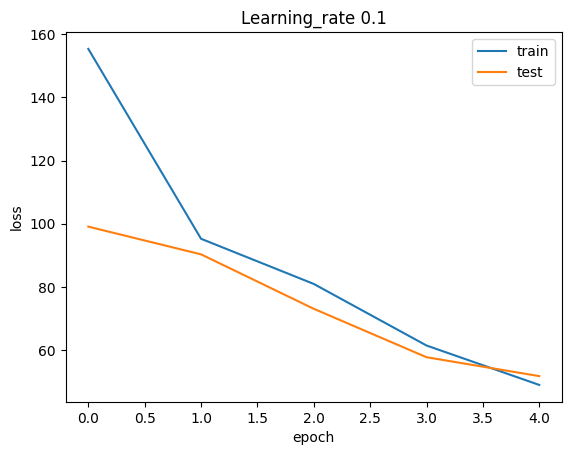

In [20]:
#Vamos a ver en grafico los entrenamientos con los diferentes learning rates
plt.plot(hist7.history['loss'], label="train")
plt.plot(hist7.history['val_loss'], label="test")
plt.title('Learning_rate 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Con el learning_rate 0.1 vemos que las predicciones son malas. El error demasiado alto.***

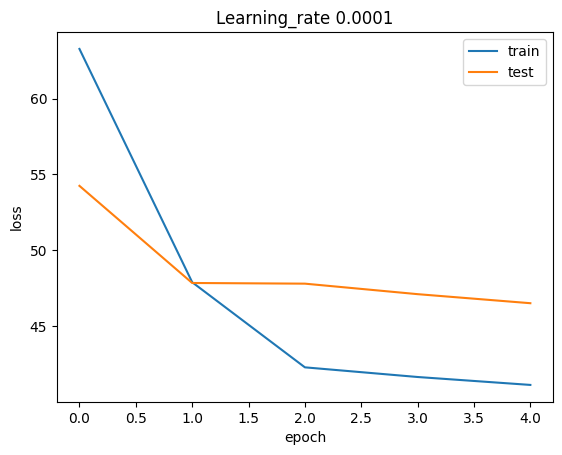

In [21]:
# Learning_rate 0.0001
plt.plot(hist8.history['loss'], label="train")
plt.plot(hist8.history['val_loss'], label="test")
plt.title('Learning_rate 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Con este learning_rate tenemos demasiado sobreajuste y error del test muy alto también (47).***

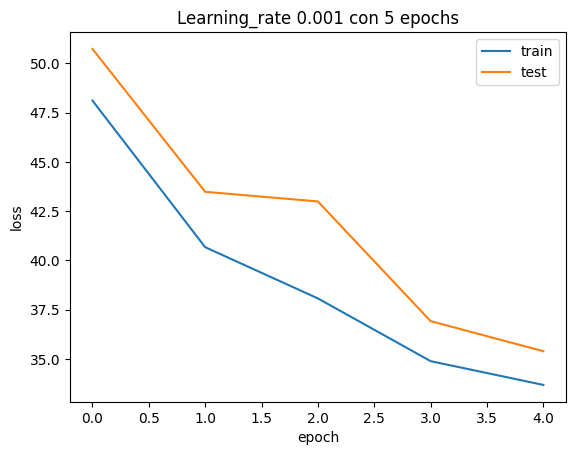

In [22]:
# Learning_rate 0.001
plt.plot(hist5.history['loss'], label="train")
plt.plot(hist5.history['val_loss'], label="test")
plt.title('Learning_rate 0.001 con 5 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Aquí vemos que las dos líneas se mueven más o menos igual, aunque también hay un pequeño sobreajuste.***

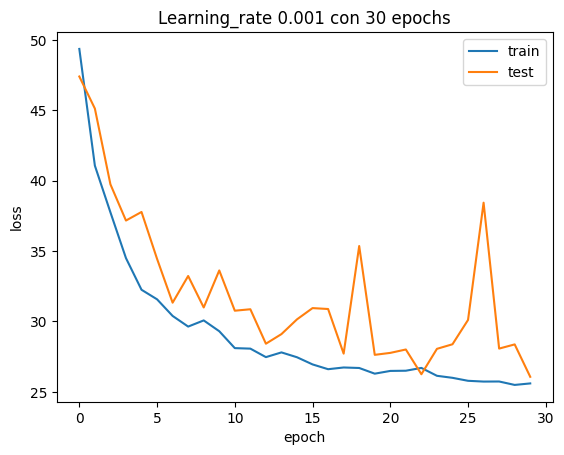

In [23]:
#Vamos a verlo en grafico para el modelo de learning_rate = 0.001 y epochs 30
plt.plot(hist9.history['loss'], label="train")
plt.plot(hist9.history['val_loss'], label="test")
plt.title('Learning_rate 0.001 con 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Con el learning_rate = 0.0001 y 0.1 nos ha ido mal.***

***Con el 0.001 es cuando mejor nos ha ido, el entrenamiento ha ido muy bien pero el test tiene muchos saltos.***

***No es el rendimiento que nos gustaría tener.***

***Vamos a intentar aplanar los saltos añadiendo alguna capa dropout.***

In [24]:
# Configuramos la red
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt10 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model10.compile(
    optimizer= opt10,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist10 = model10.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 13s 20ms/step - loss: 47.8963 - mean_absolute_percentage_error: 47.8963 - val_loss: 46.5699 - val_mean_absolute_percentage_error: 46.5699
Epoch 2/30
511/511 [==============================] - 10s 20ms/step - loss: 41.1612 - mean_absolute_percentage_error: 41.1612 - val_loss: 44.2688 - val_mean_absolute_percentage_error: 44.2688
Epoch 3/30
511/511 [==============================] - 10s 20ms/step - loss: 39.0072 - mean_absolute_percentage_error: 39.0072 - val_loss: 39.9717 - val_mean_absolute_percentage_error: 39.9717
Epoch 4/30
511/511 [==============================] - 9s 18ms/step - loss: 36.5225 - mean_absolute_percentage_error: 36.5225 - val_loss: 38.1803 - val_mean_absolute_percentage_error: 38.1803
Epoch 5/30
511/511 [==============================] - 10s 20ms/step - loss: 35.0256 - mean_absolute_percentage_error: 35.0256 - val_loss: 37.0730 - val_mean_absolute_percentage_error: 37.0730
Epoch 6/30
511/511 [=====================

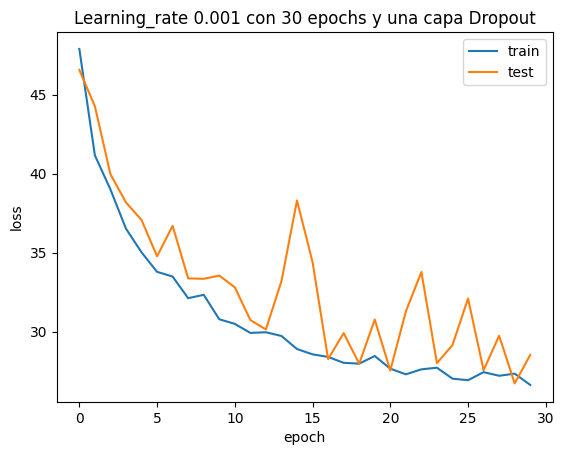

In [25]:
# Grafico para el modelo de learning_rate = 0.001 y epochs 30 y una capa Dropout
plt.plot(hist10.history['loss'], label="train")
plt.plot(hist10.history['val_loss'], label="test")
plt.title('Learning_rate 0.001 con 30 epochs y una capa Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Probamos una red eliminando la capa de 1024 neuronas y la capa Dropout.***

In [26]:
# Configuramos la red
model11 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt11 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model11.compile(
    optimizer= opt11,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist11 = model11.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 6s 8ms/step - loss: 50.4355 - mean_absolute_percentage_error: 50.4355 - val_loss: 47.3982 - val_mean_absolute_percentage_error: 47.3982
Epoch 2/30
511/511 [==============================] - 5s 10ms/step - loss: 41.4897 - mean_absolute_percentage_error: 41.4897 - val_loss: 45.5115 - val_mean_absolute_percentage_error: 45.5115
Epoch 3/30
511/511 [==============================] - 4s 8ms/step - loss: 39.2475 - mean_absolute_percentage_error: 39.2475 - val_loss: 42.8128 - val_mean_absolute_percentage_error: 42.8128
Epoch 4/30
511/511 [==============================] - 4s 9ms/step - loss: 35.8250 - mean_absolute_percentage_error: 35.8250 - val_loss: 37.1591 - val_mean_absolute_percentage_error: 37.1591
Epoch 5/30
511/511 [==============================] - 5s 10ms/step - loss: 33.0490 - mean_absolute_percentage_error: 33.0490 - val_loss: 35.1917 - val_mean_absolute_percentage_error: 35.1917
Epoch 6/30
511/511 [============================

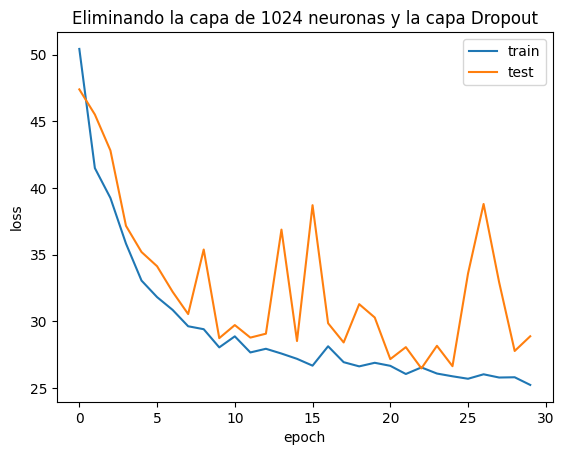

In [27]:
# Grafico para el modelo de learning_rate = 0.001 y epochs 30 eliminando la capa de 1024 neuronas y la capa Dropout
plt.plot(hist11.history['loss'], label="train")
plt.plot(hist11.history['val_loss'], label="test")
plt.title('Eliminando la capa de 1024 neuronas y la capa Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Tampoco nos gusta por los saltos.***

***Vamos a probar quedandonos con esta arquitectura pero añadiendo una capa dropout después de las 512 neuronas.***

In [28]:
# Configuramos la red
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt12 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model12.compile(
    optimizer= opt12,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist12 = model12.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 6s 8ms/step - loss: 49.6291 - mean_absolute_percentage_error: 49.6291 - val_loss: 47.2885 - val_mean_absolute_percentage_error: 47.2885
Epoch 2/30
511/511 [==============================] - 4s 8ms/step - loss: 41.7382 - mean_absolute_percentage_error: 41.7382 - val_loss: 45.6921 - val_mean_absolute_percentage_error: 45.6921
Epoch 3/30
511/511 [==============================] - 5s 10ms/step - loss: 39.7842 - mean_absolute_percentage_error: 39.7842 - val_loss: 42.2875 - val_mean_absolute_percentage_error: 42.2875
Epoch 4/30
511/511 [==============================] - 4s 8ms/step - loss: 37.5996 - mean_absolute_percentage_error: 37.5996 - val_loss: 39.3574 - val_mean_absolute_percentage_error: 39.3574
Epoch 5/30
511/511 [==============================] - 4s 8ms/step - loss: 35.6467 - mean_absolute_percentage_error: 35.6467 - val_loss: 40.8620 - val_mean_absolute_percentage_error: 40.8620
Epoch 6/30
511/511 [=============================

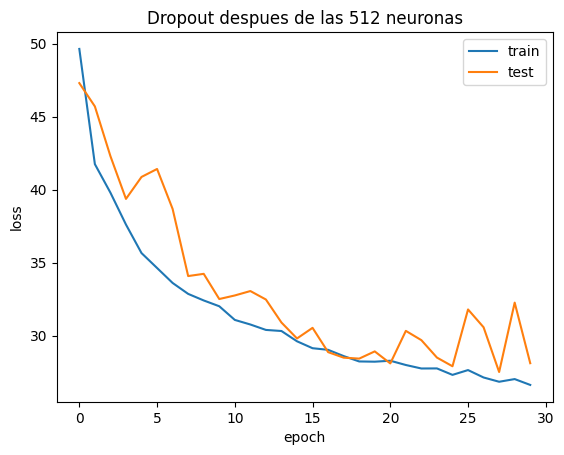

In [29]:
# Grafico para el modelo de learning_rate = 0.001 y epochs 30 eliminando la capa de 1024 neuronas y añadiendo una capa Dropout después de las 512 neuronas
plt.plot(hist12.history['loss'], label="train")
plt.plot(hist12.history['val_loss'], label="test")
plt.title('Dropout despues de las 512 neuronas')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Ha ido algo mejor. No son tan altos los saltos.***

***Vamos a añadir otra capa Dropout despues de las 256 neuronas.***

In [30]:
# Configuramos la red
model13 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation = 'relu'),
     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt13 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model13.compile(
    optimizer= opt13,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist13 = model13.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 8s 11ms/step - loss: 49.3088 - mean_absolute_percentage_error: 49.3088 - val_loss: 47.2079 - val_mean_absolute_percentage_error: 47.2079
Epoch 2/30
511/511 [==============================] - 4s 8ms/step - loss: 41.7659 - mean_absolute_percentage_error: 41.7659 - val_loss: 45.5432 - val_mean_absolute_percentage_error: 45.5432
Epoch 3/30
511/511 [==============================] - 6s 12ms/step - loss: 40.0906 - mean_absolute_percentage_error: 40.0906 - val_loss: 42.8895 - val_mean_absolute_percentage_error: 42.8895
Epoch 4/30
511/511 [==============================] - 4s 9ms/step - loss: 37.6036 - mean_absolute_percentage_error: 37.6036 - val_loss: 39.3922 - val_mean_absolute_percentage_error: 39.3922
Epoch 5/30
511/511 [==============================] - 4s 8ms/step - loss: 36.2516 - mean_absolute_percentage_error: 36.2516 - val_loss: 38.1106 - val_mean_absolute_percentage_error: 38.1106
Epoch 6/30
511/511 [============================

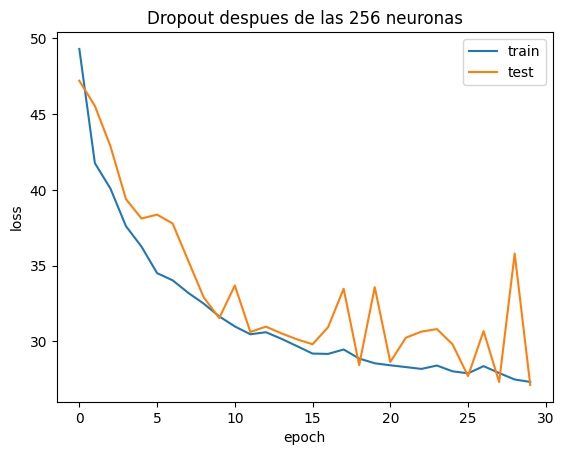

In [31]:
# Añadiendo otra capa Dropout despues de las 256 neuronas
plt.plot(hist13.history['loss'], label="train")
plt.plot(hist13.history['val_loss'], label="test")
plt.title('Dropout despues de las 256 neuronas')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Sin la segunda capa de Dropout los resultados son mejores. Los saltos por lo menos no superan el error de 35.***

***Vamos a poner el valor de la capa Dropout despues de las 512 neuronas a 40 y eliminar la segunda a ver que resultados nos da.***

In [32]:
# Configuramos la red
model14 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt14 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model14.compile(
    optimizer= opt14,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist14 = model14.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 6s 8ms/step - loss: 50.8349 - mean_absolute_percentage_error: 50.8349 - val_loss: 47.3709 - val_mean_absolute_percentage_error: 47.3709
Epoch 2/30
511/511 [==============================] - 4s 8ms/step - loss: 42.0105 - mean_absolute_percentage_error: 42.0105 - val_loss: 46.6935 - val_mean_absolute_percentage_error: 46.6935
Epoch 3/30
511/511 [==============================] - 5s 11ms/step - loss: 40.6905 - mean_absolute_percentage_error: 40.6905 - val_loss: 45.0366 - val_mean_absolute_percentage_error: 45.0366
Epoch 4/30
511/511 [==============================] - 4s 8ms/step - loss: 39.2684 - mean_absolute_percentage_error: 39.2684 - val_loss: 42.1086 - val_mean_absolute_percentage_error: 42.1086
Epoch 5/30
511/511 [==============================] - 4s 8ms/step - loss: 37.4817 - mean_absolute_percentage_error: 37.4817 - val_loss: 38.9839 - val_mean_absolute_percentage_error: 38.9839
Epoch 6/30
511/511 [=============================

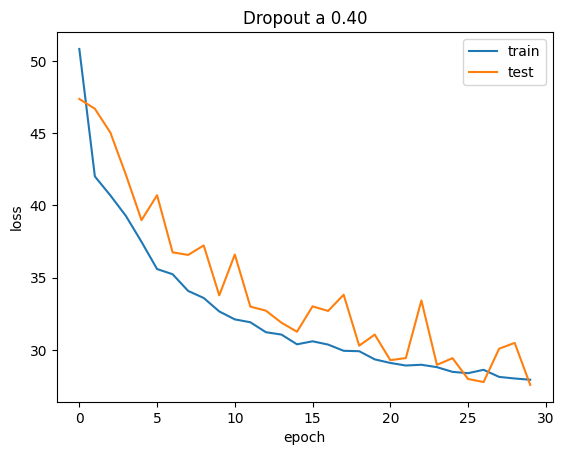

In [33]:
# Modificando el valor de la capa Dropout a 0.4
plt.plot(hist14.history['loss'], label="train")
plt.plot(hist14.history['val_loss'], label="test")
plt.title('Dropout a 0.40')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***Y la última prueba que vamos a hacer es modificar el valor de Dropout a 0.10.***

In [34]:
# Configuramos la red
model15 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=9),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.10),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Especificamos el Optimizador
opt15 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

# Compilamos el modelo
model15.compile(
    optimizer= opt15,
    loss = actual_loss,
    metrics = actual_loss
)

# Entrenamos el modelo
hist15 = model15.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 6s 8ms/step - loss: 49.5490 - mean_absolute_percentage_error: 49.5490 - val_loss: 47.1075 - val_mean_absolute_percentage_error: 47.1075
Epoch 2/30
511/511 [==============================] - 5s 10ms/step - loss: 41.2369 - mean_absolute_percentage_error: 41.2369 - val_loss: 46.0597 - val_mean_absolute_percentage_error: 46.0597
Epoch 3/30
511/511 [==============================] - 4s 8ms/step - loss: 39.1320 - mean_absolute_percentage_error: 39.1320 - val_loss: 42.5149 - val_mean_absolute_percentage_error: 42.5149
Epoch 4/30
511/511 [==============================] - 4s 8ms/step - loss: 36.5219 - mean_absolute_percentage_error: 36.5219 - val_loss: 39.0260 - val_mean_absolute_percentage_error: 39.0260
Epoch 5/30
511/511 [==============================] - 5s 10ms/step - loss: 34.3025 - mean_absolute_percentage_error: 34.3025 - val_loss: 36.4056 - val_mean_absolute_percentage_error: 36.4056
Epoch 6/30
511/511 [============================

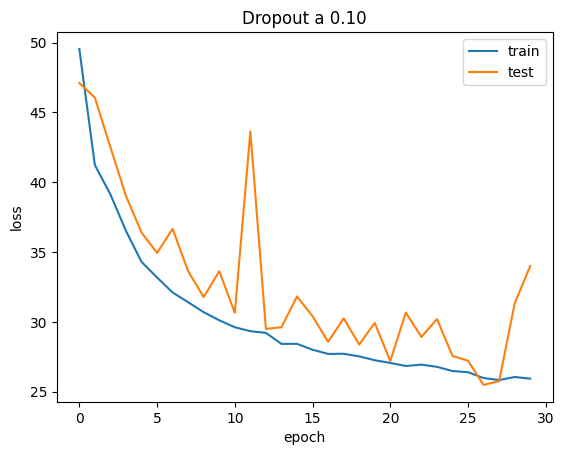

In [35]:
# Modificando el valor de la capa Dropout a 0.1
plt.plot(hist15.history['loss'], label="train")
plt.plot(hist15.history['val_loss'], label="test")
plt.title('Dropout a 0.10')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***De los intentos que hemos realizado para eliminar los saltos el mejor modelo nos lo da la arquitectura de 512, 256, 128, 64, 32 , 16, 8 neuronas con una capa Dropout despues de las 512 neuronas con un valor de 0.40. (hist14)***

***Se podrían hacer más pruebas para dar con un resultado que nos satisface más.***

In [39]:
%%shell
jupyter nbconvert --to html ///content/Caso-Practico_Mariya.ipynb

[NbConvertApp] Converting notebook ///content/Caso-Practico_Mariya.ipynb to html
[NbConvertApp] Writing 1322119 bytes to /content/Caso-Practico_Mariya.html
